In [1]:
import pandas as pd
import networkx as nx
from nxviz.plots import CircosPlot
from collections import defaultdict
import matplotlib.pyplot as plt
import statistics 

In [2]:
exports_edgelist = pd.read_csv("../data/exports_edgelist.csv")
exports_nodelist = pd.read_csv("../data/exports_nodelist.csv", 
                                keep_default_na=False)

In [3]:
G = nx.from_pandas_edgelist(exports_edgelist,
                            source='Source',
                            target='Target',
                            edge_attr=True,
                            create_using=nx.DiGraph())

In [4]:
degree_tab = pd.DataFrame(
    G.in_degree(weight='Weights')).rename(columns={0:'Node', 1:'in-degree'})
exports_nodelist = pd.merge(exports_nodelist, degree_tab, on='Node').set_index('Node').to_dict('index')

In [5]:
nx.set_node_attributes(G, exports_nodelist)

In [6]:
only_na = [n for n,d in G.nodes(data=True) if d['continent']=='NA']

In [7]:
G_na = nx.subgraph(G, only_na)

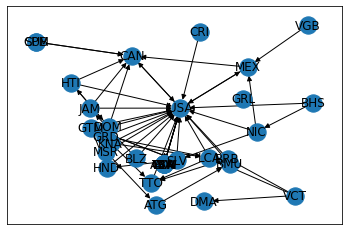

In [8]:
nx.draw_networkx(G_na, pos=nx.kamada_kawai_layout(G_na))

In [9]:
usa_nbrs = G.out_edges('USA', data=True)
list(usa_nbrs)

[('USA', 'CAN', {'Source': 'USA', 'Target': 'CAN', 'Weight': 18.2609}),
 ('USA', 'MEX', {'Source': 'USA', 'Target': 'MEX', 'Weight': 15.7423}),
 ('USA', 'CHN', {'Source': 'USA', 'Target': 'CHN', 'Weight': 8.404})]

### Metrics

In [10]:
continent_list = set([d['continent'] for n,d in G.nodes(data=True)])
per_continent_info = defaultdict(dict)
for cont in continent_list:
    current_nodes = [n for n,d in G.nodes(data=True) if d['continent']==cont]
    degrs = [G.in_degree(weight='Weights')[n] for n in current_nodes]
    
    cont_averg_degr = statistics.mean(degrs)
    cont_max_degr = max(degrs)
    
    cont_recipr = statistics.mean(nx.reciprocity(G, nodes=current_nodes).values())
    
    per_continent_info[cont] = [cont_averg_degr, cont_max_degr, cont_recipr]

In [11]:
per_continent_info = pd.DataFrame(per_continent_info).T
per_continent_info.rename(columns={0:'Average Degree', 1:'Max Degree', 2:'Reciprocity'})

,Average Degree,Max Degree,Reciprocity
AS,4.080000,58.0,0.026631
EU,5.166667,41.0,0.140302
AF,0.814815,9.0,0.029012
SA,1.076923,4.0,0.078388
OC,0.476190,6.0,0.000000
NA,3.531250,81.0,0.095414


In [12]:
nx.transitivity(G)

0.30357142857142855

In [13]:
nx.attribute_assortativity_coefficient(G, 'continent')

0.35959879943771145

### Viz

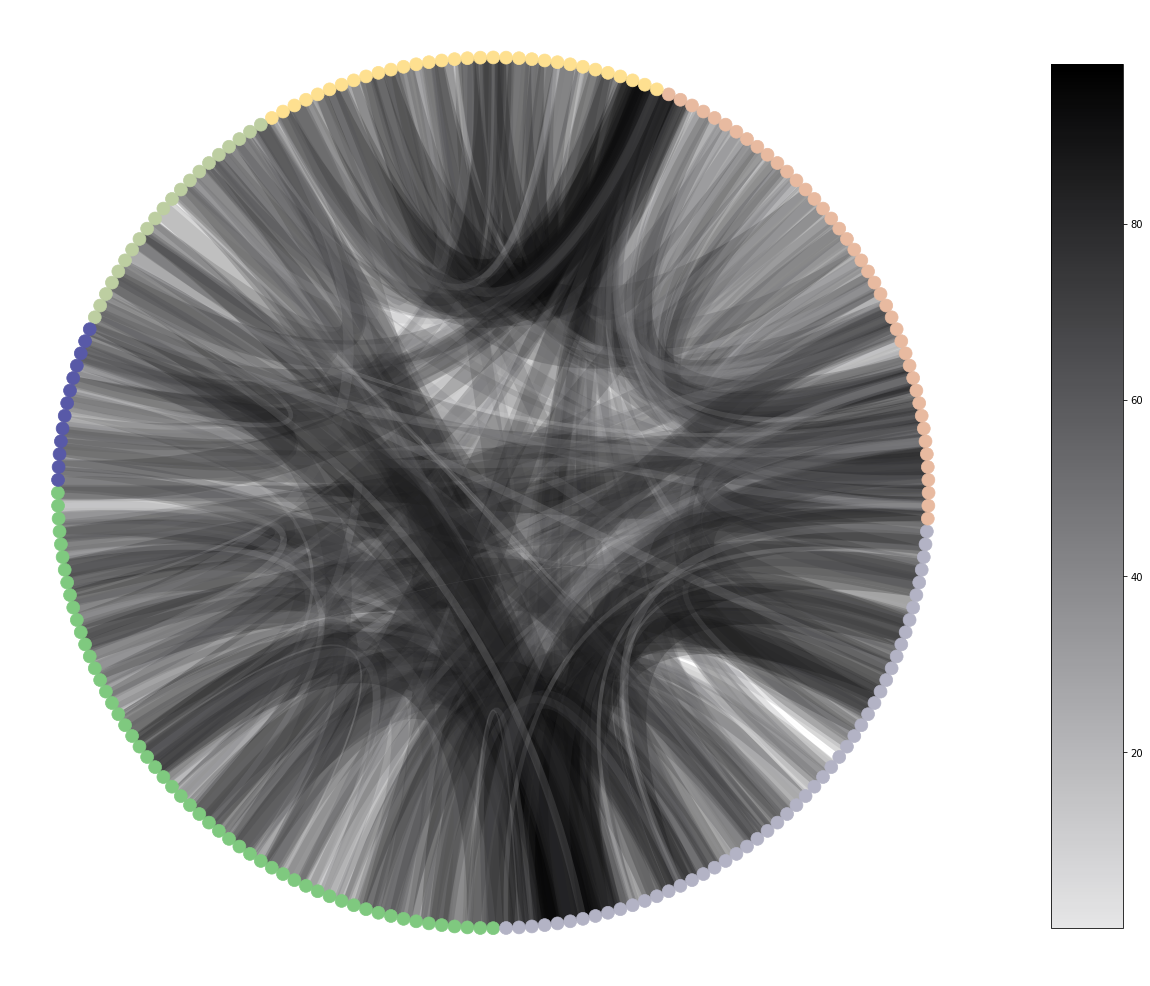

In [14]:
c = CircosPlot(G, node_color='continent', 
                   node_size=5,
                   figsize=(20, 20),
                   dpi=600,
                   node_grouping='continent',
                   node_order='continent',
                   edge_width='Weight',
                   edge_color='Weight',
                   node_label_layout='rotation',
                   fontfamily='monospace',)

c.draw()
plt.show()